In [20]:
# import relevant packages
# So sorry that I made a mistake in the results. I deleted my Figure 3, but forgot to delete the sentence describing it.
# Sorry for the confusion, I know there will be a big deduction because of it. Thank you for taking the time to grade my assessment!

import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# UNCOMMENT THE FOLLOWING IF USING GOOGLE COLAB
#from google.colab import files
#uploaded = files.upload()

# In the next line, replace sample_boxplot_data.csv with the filename of your data:
alldata=pd.read_csv('data_2019.csv')
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   local_authority_area  152 non-null    object
 1   2008_cases_total      152 non-null    int64 
 2   2013_cases_total      152 non-null    int64 
 3   2018_cases_total      152 non-null    int64 
 4   2008_pop_total        152 non-null    int64 
 5   2013_pop_total        152 non-null    int64 
 6   2018_pop_total        152 non-null    int64 
 7   2008_cases_male       152 non-null    int64 
 8   2013_cases_male       152 non-null    int64 
 9   2018_cases_male       152 non-null    int64 
 10  2008_pop_male         152 non-null    int64 
 11  2013_pop_male         152 non-null    int64 
 12  2018_pop_male         152 non-null    int64 
 13  2008_cases_female     152 non-null    int64 
 14  2013_cases_female     152 non-null    int64 
 15  2018_cases_female     152 non-null    in

In [15]:
alldata['prop_2008'] = alldata['2008_cases_total']/alldata['2008_pop_total']
alldata['prop_2013'] = alldata['2013_cases_total']/alldata['2013_pop_total']
alldata['prop_2018'] = alldata['2018_cases_total']/alldata['2018_pop_total']
alldata['change_08_13'] = alldata['prop_2013']-alldata['prop_2008']
alldata['change_13_18'] = alldata['prop_2018']-alldata['prop_2013']
alldata['change_08_18'] = alldata['prop_2018']-alldata['prop_2008']
alldata['male_2008_p'] = alldata['2008_cases_male']/alldata['2008_pop_male']
alldata['male_2013_p'] = alldata['2013_cases_male']/alldata['2013_pop_male']
alldata['male_2018_p'] = alldata['2018_cases_male']/alldata['2018_pop_male']
alldata['female_2008_p'] = alldata['2008_cases_female']/alldata['2008_pop_female']
alldata['female_2013_p'] = alldata['2013_cases_female']/alldata['2013_pop_female']
alldata['female_2018_p'] = alldata['2018_cases_female']/alldata['2018_pop_female']

alldata.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,prop_2018,change_08_13,change_13_18,change_08_18,male_2008_p,male_2013_p,male_2018_p,female_2008_p,female_2013_p,female_2018_p
0,Isles of Scilly,5,1,4,2200,2385,2440,2,0,1,...,0.001639,-0.001853,0.001220,-0.000633,0.001843,0.000000,0.000701,0.002691,0.000926,0.002959
1,Rutland,88,102,86,38363,39872,42952,28,23,26,...,0.002002,0.000264,-0.000556,-0.000292,0.001478,0.001133,0.001121,0.003089,0.004038,0.003037
2,Milton Keynes,839,869,867,234508,246600,252016,314,327,295,...,0.003440,-0.000054,-0.000084,-0.000137,0.002739,0.002773,0.002504,0.004379,0.004212,0.004262
3,Wiltshire,1372,1474,1516,457236,493515,522318,472,520,521,...,0.002902,-0.000014,-0.000084,-0.000098,0.002081,0.002090,0.001972,0.003906,0.003899,0.003856
4,Torbay,615,622,633,134925,136936,141873,169,173,200,...,0.004462,-0.000016,-0.000081,-0.000096,0.002591,0.002485,0.002664,0.006400,0.006669,0.006483


In [16]:
data=alldata

In [17]:
alpha = 0.05
std2008=0.001371
std2013=0.001391
std2018=0.001387

In [12]:
data1 = data['prop_2008']
data2 = data['prop_2013']
test_stat, p_value = sps.ttest_ind(data1, data2, equal_var = equal_stds)
print("p-value =", p_value)

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.")

p-value = 0.4779845515352684
p-value >= significance threshold.
No significant evidence to reject H0.
Assume samples are drawn from populations with the same mean.


In [18]:
std_ratio = std2008/std2013
print("std_ratio =", std_ratio)
if std_ratio > 0.5 and std_ratio < 2:
    print("Can assume equal population standard deviations.")
    equal_stds = True
else:
    print("Cannot assume equal population standard deviations.")
    equal_stds = False

data1 = data['prop_2008']
data2 = data['prop_2013']
test_stat, p_value = sps.ttest_ind(data1, data2, equal_var = equal_stds)
print("p-value =", p_value)

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.")

std_ratio = 0.9856218547807333
Can assume equal population standard deviations.
p-value = 0.4779845515352684
p-value >= significance threshold.
No significant evidence to reject H0.
Assume samples are drawn from populations with the same mean.


In [19]:
std_ratio = std2013/std2018
print("std_ratio =", std_ratio)
if std_ratio > 0.5 and std_ratio < 2:
    print("Can assume equal population standard deviations.")
    equal_stds = True
else:
    print("Cannot assume equal population standard deviations.")
    equal_stds = False

data3 = data['prop_2013']
data4 = data['prop_2018']
test_stat, p_value = sps.ttest_ind(data3, data4, equal_var = equal_stds)
print("p-value =", p_value)

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.")

std_ratio = 1.0028839221341024
Can assume equal population standard deviations.
p-value = 0.13802291646844367
p-value >= significance threshold.
No significant evidence to reject H0.
Assume samples are drawn from populations with the same mean.


In [21]:
std_ratio = std2008/std2018
print("std_ratio =", std_ratio)
if std_ratio > 0.5 and std_ratio < 2:
    print("Can assume equal population standard deviations.")
    equal_stds = True
else:
    print("Cannot assume equal population standard deviations.")
    equal_stds = False

test_stat, p_value = sps.ttest_ind(data1, data4, equal_var = equal_stds)
print("p-value =", p_value)

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.")

std_ratio = 0.9884643114635905
Can assume equal population standard deviations.
p-value = 0.02788828028675412
p-value < significance threshold.
Reject H0. Accept H1.
Conclude that samples are drawn from populations with different means.


-5.9190686948160876

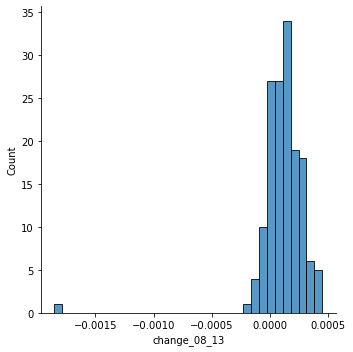

In [5]:
sns.displot(data['change_08_13'])
data.change_08_13.skew()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7de7986670>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7de7986cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7de7986220>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7de7991430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7de79917c0>],
 'means': []}

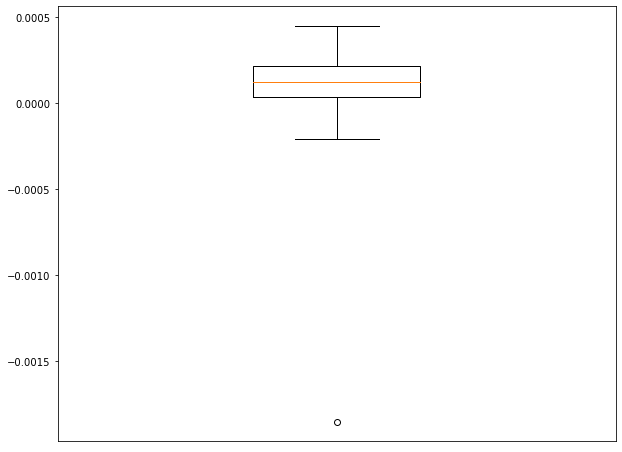

In [10]:
plt.figure(figsize=(10,8))

# Uncomment the next three lines to set the axis limits (otherwise they will be set automatically):
#axis_min = 0.95
#axis_max = 4.05
#plt.ylim([axis_min,axis_max])

# The next lines create and save the plot:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(data['change_08_13'], manage_ticks=(False))

In [11]:
def detect_outliers(sr):
    q1 = sr.quantile(0.25)
    q3 = sr.quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers = sr.loc[(sr < fence_low) | (sr > fence_high)]
    return outliers
detect_outliers(data['change_08_13'])

0   -0.001853
Name: change_08_13, dtype: float64

In [21]:
change_08_13_drop = data.drop([0])
change_08_13_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   local_authority_area  151 non-null    object 
 1   2008_cases_total      151 non-null    int64  
 2   2013_cases_total      151 non-null    int64  
 3   2018_cases_total      151 non-null    int64  
 4   2008_pop_total        151 non-null    int64  
 5   2013_pop_total        151 non-null    int64  
 6   2018_pop_total        151 non-null    int64  
 7   2008_cases_male       151 non-null    int64  
 8   2013_cases_male       151 non-null    int64  
 9   2018_cases_male       151 non-null    int64  
 10  2008_pop_male         151 non-null    int64  
 11  2013_pop_male         151 non-null    int64  
 12  2018_pop_male         151 non-null    int64  
 13  2008_cases_female     151 non-null    int64  
 14  2013_cases_female     151 non-null    int64  
 15  2018_cases_female     1

0.20331305375785333

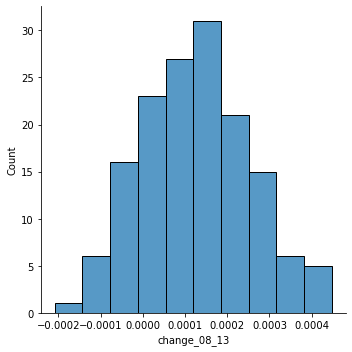

In [22]:
sns.displot(change_08_13_drop['change_08_13'])
change_08_13_drop.change_08_13.skew()
